In [1]:
import re
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
beers_csv = "beers.csv"
breweries_csv = "breweries.csv"

beers_df = pd.read_csv(beers_csv)
breweries_df = pd.read_csv(breweries_csv)
beers_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [3]:
breweries_df = breweries_df.rename(columns={"Unnamed: 0":"brewery_id"})
breweries_df

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [4]:
# pd.merge(beers_df, breweries_df, )
poop_df = breweries_df.merge(beers_df, on="brewery_id")
#poop_df.to_csv("poop.csv")

In [6]:
poop_df.nlargest(5,['abv'])

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
374,51,Upslope Brewing Company,Boulder,CO,2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),19.2
7,1,Against the Grain Brewery,Louisville,KY,70,0.125,80.0,2685,London Balling,English Barleywine,16.0
143,17,Tin Man Brewing Company,Evansville,IN,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,16.0
375,51,Upslope Brewing Company,Boulder,CO,2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,19.2
335,46,Sixpoint Craft Ales,Brooklyn,NY,1857,0.100,52.0,2574,4Beans,Baltic Porter,12.0


Text(0, 0.5, 'Count of Beer')

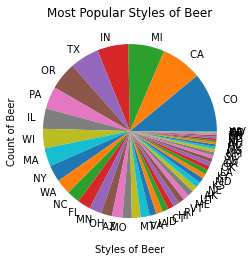

In [7]:
poop_df['state'].value_counts(15).plot(kind = "pie")
plt.title("Most Popular Styles of Beer")
plt.xlabel("Styles of Beer")
plt.ylabel("Count of Beer")

In [8]:
print(beers_df.abv.describe())

count    2348.000000
mean        0.059773
std         0.013542
min         0.001000
25%         0.050000
50%         0.056000
75%         0.067000
max         0.128000
Name: abv, dtype: float64


In [10]:
total_df = poop_df.groupby(by = "style").describe()
total_df

brewery_id                                       \
                                count        mean         std   min    25%   
style                                                                        
Abbey Single Ale                  2.0   57.000000    0.000000  57.0   57.0   
Altbier                          13.0  220.000000  137.471209  25.0  122.0   
American Adjunct Lager           18.0  163.000000   89.903216  38.0  131.0   
American Amber / Red Ale        133.0  248.045113  158.265641   4.0  101.0   
American Amber / Red Lager       29.0  305.965517  169.837208  35.0  129.0   
...                               ...         ...         ...   ...    ...   
Tripel                           11.0  155.454545  159.177488   6.0   27.5   
Vienna Lager                     20.0  296.250000  134.294991  51.0  192.0   
Wheat Ale                         1.0    3.000000         NaN   3.0    3.0   
Winter Warmer                    15.0  221.733333  130.581374  30.0  115.5   
Witbier                          51.0  257.490196  164.659330   7.0  122.0   

                                                 Unnamed: 0               ...  \
                              50%     75%    max      count         mean  ...   
style                                                                     ...   
Abbey Single Ale             57.0   57.00   57.0        2.0   716.500000  ...   
Altbier                     200.0  270.00  490.0       13.0  1124.153846  ...   
American Adjunct Lager      131.0  149.75  473.0       18.0  1684.277778  ...   
American Amber / Red Ale    219.0  375.00  552.0      133.0  1146.699248  ...   
American Amber / Red Lager  390.0  439.00  533.0       29.0  1324.620690  ...   
...                           ...     ...    ...        ...          ...  ...   
Tripel                       64.0  339.00  368.0       11.0  1155.454545  ...   
Vienna Lager                300.0  370.25  498.0       20.0  1111.300000  ...   
Wheat Ale                     3.0    3.00    3.0        1.0  1337.000000  ...   
Winter Warmer               179.0  362.00  371.0       15.0  1073.066667  ...   
Witbier                     284.0  377.00  535.0       51.0  1175.352941  ...   

                                 id         ounces                             \
                                75%     max  count       mean       std   min   
style                                                                           
Abbey Single Ale            2350.50  2505.0    2.0  12.000000  0.000000  12.0   
Altbier                     2339.00  2605.0   13.0  13.538462  2.025479  12.0   
American Adjunct Lager      2273.75  2369.0   18.0  13.333333  3.067860  12.0   
American Amber / Red Ale    1952.00  2660.0  133.0  13.293233  1.878031  12.0   
American Amber / Red Lager  1598.00  2588.0   29.0  13.241379  2.641092  12.0   
...                             ...     ...    ...        ...       ...   ...   
Tripel                      2153.00  2646.0   11.0  14.990909  3.655258  12.0   
Vienna Lager                1223.75  2226.0   20.0  13.000000  1.777047  12.0   
Wheat Ale                   2666.00  2666.0    1.0  16.000000       NaN  16.0   
Winter Warmer               1896.00  2255.0   15.0  13.066667  1.830951  12.0   
Witbier                     1990.00  2525.0   51.0  13.333333  1.904381  12.0   

                                                    
                             25%   50%   75%   max  
style                                               
Abbey Single Ale            12.0  12.0  12.0  12.0  
Altbier                     12.0  12.0  16.0  16.0  
American Adjunct Lager      12.0  12.0  12.0  24.0  
American Amber / Red Ale    12.0  12.0  16.0  16.0  
American Amber / Red Lager  12.0  12.0  12.0  24.0  
...                          ...   ...   ...   ...  
Tripel                      12.0  16.0  16.0  24.0  
Vienna Lager                12.0  12.0  13.0  16.0  
Wheat Ale                   16.0  16.0  16.0  16.0  
Winter Warmer               

In [11]:
total_df.to_csv("ABV by descrb.csv")

In [13]:
beers_df['style'].value_counts()[:15] lot(kind = "bar", color = "blue")
plt.title("Most Popular Styles of Beer")
plt.xlabel("Styles of Beer")
plt.ylabel("Count of Beer")

SyntaxError: invalid syntax (<ipython-input-13-f15188d2a629>, line 1)

Text(0, 0.5, 'Count of Beer Styles')

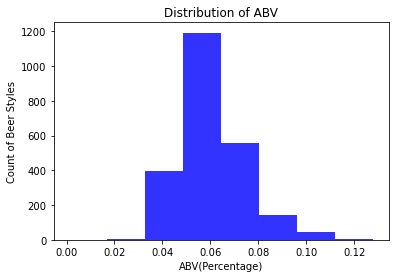

In [28]:
plt.hist("abv", 8, data = beers_df, alpha = 0.8, color = "blue")
plt.title("Distribution of ABV")
plt.xlabel("ABV(Percentage)")
plt.ylabel("Count of Beer Styles")

Text(0, 0.5, 'Count of Beer Styles')

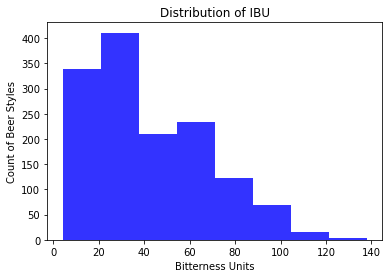

In [26]:
plt.hist("ibu", 8, data = beers_df, alpha = 0.8, color = "blue")
plt.title("Distribution of IBU")
plt.xlabel("Bitterness Units")
plt.ylabel("Count of Beer Styles")

Text(0.5, 1.0, 'IBU vs. ABV')

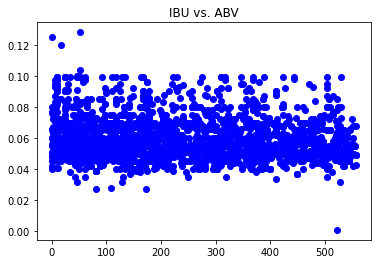

In [29]:
plt.scatter("brewery_id", "abv", data = poop_df, color = "blue")
plt.title("IBU vs. ABV")

In [17]:
abv_by_state = poop_df.groupby('state')[['abv']].mean(5).sort_values(by='abv', ascending=False)

In [18]:
plt.figure(figsize=(8,11))
sns.barplot(y=abv_by_state.index, x=abv_by_state['abv'], orient='horizontal'
plt.title('States Ranked by Average ABV')
plt.ylabel('State')
plt.xlabel('ABV')

SyntaxError: invalid syntax (<ipython-input-18-5c7b14221b10>, line 3)

In [19]:
print('The highest ABV beer:', beers_df['abv'].max())
print('The lowest ABV beer:', beers_df['abv'].min())

The highest ABV beer: 0.128
The lowest ABV beer: 0.001


In [20]:
lowest_abv = beers_df.groupby('style')[['abv']].mean().nlargest(5, columns='abv')
lowest_abv.sort_values(by='abv', ascending=False)

,abv
style,
English Barleywine,0.107667
Quadrupel (Quad),0.104000
American Barleywine,0.099000
American Malt Liquor,0.099000
Russian Imperial Stout,0.097636


Text(0.5, 0, 'ABV')

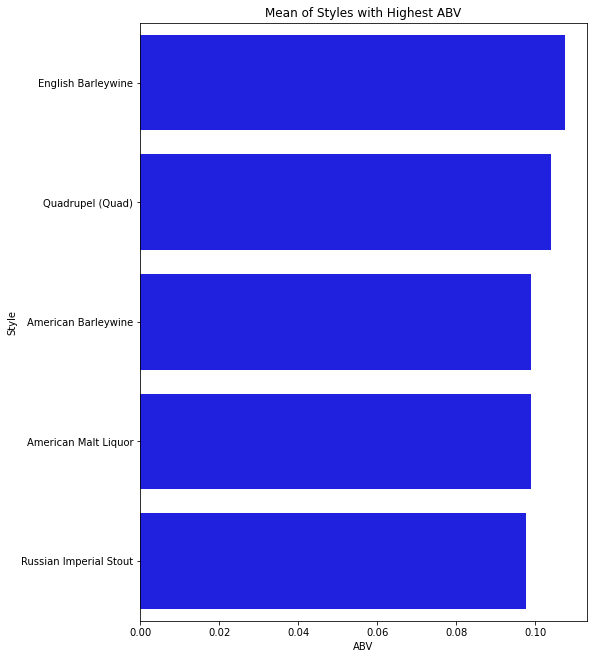

In [21]:
plt.figure(figsize=(8,11))
sns.barplot(y=lowest_abv.index, x=lowest_abv['abv'], orient='horizontal', color='blue')
plt.title('Mean of Styles with Highest ABV')
plt.ylabel('Style')
plt.xlabel('ABV')

In [22]:
lowest_abv = beers_df.groupby('style')[['abv']].mean().nsmallest(5, columns='abv')
lowest_abv.sort_values(by='abv', ascending=False)

,abv
style,
Berliner Weissbier,0.043909
English Dark Mild Ale,0.041500
Light Lager,0.040417
Radler,0.040333
Low Alcohol Beer,0.001000


Text(0.5, 0, 'ABV')

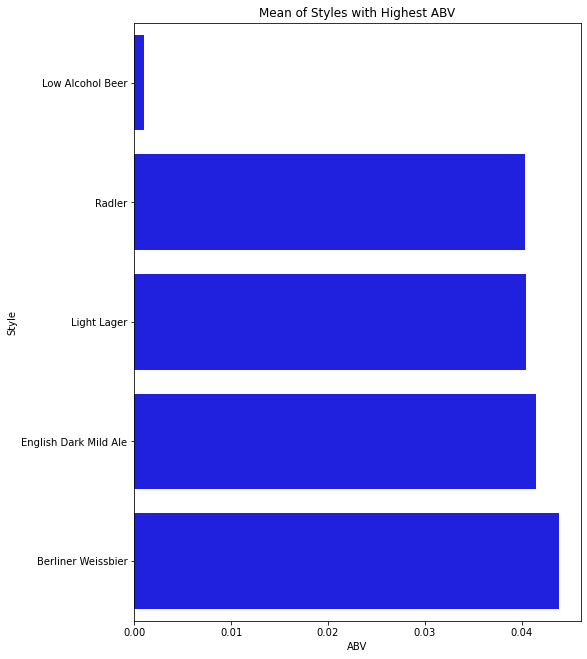

In [23]:
plt.figure(figsize=(8,11))
sns.barplot(y=lowest_abv.index, x=lowest_abv['abv'], orient='horizontal', color='blue')
plt.title('Mean of Styles with Highest ABV')
plt.ylabel('Style')
plt.xlabel('ABV')